In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Read in real estate data csv file
csvfile = 'Resources/RDC_InventoryCoreMetrics_Zip_IL.csv'


In [4]:
re_df = pd.read_csv(csvfile)
re_df.head()

C:\Users\linma\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Month,ZipCode,ZipName,State,Footnote,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,...,Pending Listing Count Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y,Total Listing Count,Total Listing Count M/M,Total Listing Count Y/Y,Pending Ratio,Pending Ratio M/M,Pending Ratio Y/Y
0,9/1/2017,60002,Antioch,IL,NaN,243000,-0.0082,0.0800,238,0.0042,...,0.2222,283100,-0.0122,0.0914,249,0.0081,0.0247,0.0462,0.0040,0.0078
1,9/1/2017,60004,Arlington Heights,IL,NaN,372900,-0.0061,0.0038,351,-0.0277,...,-0.0769,424700,0.0017,0.0359,363,-0.0346,0.0313,0.0342,-0.0074,-0.0042
2,9/1/2017,60005,Arlington Heights,IL,NaN,339900,-0.0247,0.0006,212,-0.0320,...,-0.4545,370400,-0.0152,-0.0232,218,-0.0268,-0.1417,0.0283,0.0055,-0.0170
3,9/1/2017,60007,Elk Grove Village,IL,NaN,254500,-0.0105,-0.0059,164,-0.0838,...,-0.6875,266800,-0.0060,-0.0166,169,-0.0914,-0.2522,0.0305,-0.0086,-0.0457
4,9/1/2017,60008,Rolling Meadows,IL,NaN,231200,0.0289,0.0429,127,0.0242,...,0.7500,253700,0.0342,0.0351,134,0.0388,-0.0074,0.0551,0.0148,0.0246


In [5]:
#Remove unnecessary columns

re_df_clean = re_df[["Month", "ZipCode", "ZipName", "Median Listing Price", "Active Listing Count ", "Days on Market ",]]
re_df_clean.head()

,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market
0,9/1/2017,60002,Antioch,243000,238,58
1,9/1/2017,60004,Arlington Heights,372900,351,47
2,9/1/2017,60005,Arlington Heights,339900,212,52
3,9/1/2017,60007,Elk Grove Village,254500,164,47
4,9/1/2017,60008,Rolling Meadows,231200,127,47


In [6]:
zips = pd.unique(re_df_clean["ZipCode"])
len(zips)

529

In [7]:
#Sort by days on market
#short time on market suggest more people are moving into the area than out of it.  
#Pulled the top 100 out of 529 records

fast_sells = re_df_clean.sort_values("Days on Market ", ascending=True)
fastest_sells = fast_sells.head(100)
fastest_sells

,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market
28778,3/1/2013,60603,Chicago,1029000,61,19
14536,6/1/2015,60622,Chicago,449900,168,22
3058,4/1/2017,61752,Le Roy,125000,19,23
2525,5/1/2017,61723,Atlanta,94500,13,23
1779,6/1/2017,60501,Summit Argo,158600,42,24
16104,3/1/2015,60603,Chicago,977000,48,24
16684,2/1/2015,60661,Chicago,329500,22,24
3940,2/1/2017,60606,Chicago,392500,22,24
3956,2/1/2017,60622,Chicago,507400,264,25
3368,3/1/2017,60503,Aurora,235000,77,25


In [8]:
#From this list, we want to look at zip codes that showed good results in 2017 as opposed to 2012

#fast_sells_2017 = fastest_sells.sort_values("Month", ascending=False)
#fast_sells_2017
#that didn't work because of the date formatting, so let's separate out the year
fastest_sells["Year"] = fastest_sells["Month"].str[-4:]
fastest_sells



C:\Users\linma\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market,Year
28778,3/1/2013,60603,Chicago,1029000,61,19,2013
14536,6/1/2015,60622,Chicago,449900,168,22,2015
3058,4/1/2017,61752,Le Roy,125000,19,23,2017
2525,5/1/2017,61723,Atlanta,94500,13,23,2017
1779,6/1/2017,60501,Summit Argo,158600,42,24,2017
16104,3/1/2015,60603,Chicago,977000,48,24,2015
16684,2/1/2015,60661,Chicago,329500,22,24,2015
3940,2/1/2017,60606,Chicago,392500,22,24,2017
3956,2/1/2017,60622,Chicago,507400,264,25,2017
3368,3/1/2017,60503,Aurora,235000,77,25,2017


In [9]:
#sort by year and see what comes up

fast_sells_2017 = fastest_sells.loc[fastest_sells["Year"] == "2017", :]
fast_sells_2017

,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market,Year
3058,4/1/2017,61752,Le Roy,125000,19,23,2017
2525,5/1/2017,61723,Atlanta,94500,13,23,2017
1779,6/1/2017,60501,Summit Argo,158600,42,24,2017
3940,2/1/2017,60606,Chicago,392500,22,24,2017
3956,2/1/2017,60622,Chicago,507400,264,25,2017
3368,3/1/2017,60503,Aurora,235000,77,25,2017
816,8/1/2017,60661,Chicago,384300,36,25,2017
1295,7/1/2017,60606,Chicago,535000,40,25,2017
1438,7/1/2017,61462,Monmouth,97300,45,25,2017
991,8/1/2017,62239,Dupo,76200,9,25,2017


In [10]:
#find the fastest sales in 2017

fast_sells_2017 = fastest_sells.loc[fastest_sells["Year"] == "2017", :]
fast_sells_2017

fastest_sells_2017 = fast_sells_2017.sort_values("Days on Market ", ascending=True)
fastest_sells_2017

,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market,Year
3058,4/1/2017,61752,Le Roy,125000,19,23,2017
2525,5/1/2017,61723,Atlanta,94500,13,23,2017
1779,6/1/2017,60501,Summit Argo,158600,42,24,2017
3940,2/1/2017,60606,Chicago,392500,22,24,2017
3956,2/1/2017,60622,Chicago,507400,264,25,2017
3368,3/1/2017,60503,Aurora,235000,77,25,2017
816,8/1/2017,60661,Chicago,384300,36,25,2017
1295,7/1/2017,60606,Chicago,535000,40,25,2017
1438,7/1/2017,61462,Monmouth,97300,45,25,2017
991,8/1/2017,62239,Dupo,76200,9,25,2017


In [11]:
# Used Google Maps to select some target zip codes from this top 100 in the Chicago metro area, avoiding areas near Chicago Loop: 
# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)

In [12]:
#Now, chart home pricing trends for each of the selected zip codes.

df60501 = re_df_clean[re_df_clean["ZipCode"] == 60501]
df60503 = re_df_clean[re_df_clean["ZipCode"] == 60503]
df60410 = re_df_clean[re_df_clean["ZipCode"] == 60410]
df60171 = re_df_clean[re_df_clean["ZipCode"] == 60171]
df60064 = re_df_clean[re_df_clean["ZipCode"] == 60064]
df60203 = re_df_clean[re_df_clean["ZipCode"] == 60203]
df60173 = re_df_clean[re_df_clean["ZipCode"] == 60173]
df60034 = re_df_clean[re_df_clean["ZipCode"] == 60034]
df60469 = re_df_clean[re_df_clean["ZipCode"] == 60469]
df60403 = re_df_clean[re_df_clean["ZipCode"] == 60403]
df60148 = re_df_clean[re_df_clean["ZipCode"] == 60148]
df60513 = re_df_clean[re_df_clean["ZipCode"] == 60513]

df60513.head()

,Month,ZipCode,ZipName,Median Listing Price,Active Listing Count,Days on Market
199,9/1/2017,60513,Brookfield,256700,104,37
728,8/1/2017,60513,Brookfield,262000,105,48
1257,7/1/2017,60513,Brookfield,262000,120,43
1786,6/1/2017,60513,Brookfield,259900,119,37
2315,5/1/2017,60513,Brookfield,262500,96,38


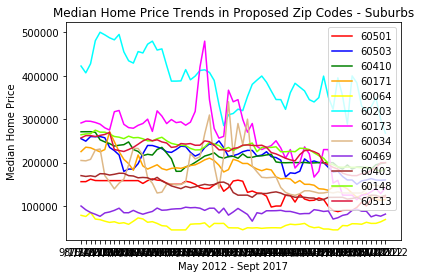

In [13]:
#Visualize real estate pricing trends for each zip code
# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)

months60501 = df60501["Month"]
price60501 = df60501["Median Listing Price"]
months60503 = df60503["Month"]
price60503 = df60503["Median Listing Price"]
months60410 = df60410["Month"]
price60410 = df60410["Median Listing Price"]
months60171 = df60171["Month"]
price60171 = df60171["Median Listing Price"]
months60064 = df60064["Month"]
price60064 = df60064["Median Listing Price"]
months60203 = df60203["Month"]
price60203 = df60203["Median Listing Price"]
months60173 = df60173["Month"]
price60173 = df60173["Median Listing Price"]
months60034 = df60034["Month"]
price60034 = df60034["Median Listing Price"]
months60034 = df60034["Month"]
price60034 = df60034["Median Listing Price"]
months60469 = df60469["Month"]
price60469 = df60469["Median Listing Price"]
months60403 = df60403["Month"]
price60403 = df60403["Median Listing Price"]
months60148 = df60148["Month"]
price60148 = df60148["Median Listing Price"]
months60513 = df60513["Month"]
price60513 = df60513["Median Listing Price"]


# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)

Summit, = plt.plot(months60501, price60501, color="red", label="60501")
Aurora, = plt.plot(months60503, price60503, color="blue", label="60503")
Channahon, = plt.plot(months60410, price60410, color="green", label="60410")
River_Grove, = plt.plot(months60171, price60171, color="orange", label="60171")
North_Chicago, = plt.plot(months60064, price60064, color="yellow", label="60064")
Evanston, = plt.plot(months60203, price60203, color="cyan", label="60203")
Schaumburg, = plt.plot(months60173, price60173, color="magenta", label="60173")
Hebron, = plt.plot(months60034, price60034, color="burlywood", label="60034")
Posen, = plt.plot(months60469, price60469, color="blueviolet", label="60469")
Crest_Hill, = plt.plot(months60403, price60403, color="brown", label="60403")
Lombard, = plt.plot(months60148, price60148, color="chartreuse", label="60148")
Brookfield, = plt.plot(months60513, price60513, color="crimson", label="60513")

plt.title("Median Home Price Trends in Proposed Zip Codes - Suburbs")
plt.xlabel("May 2012 - Sept 2017")
plt.ylabel("Median Home Price")

plt.legend(handles=[Summit, Aurora, Channahon, River_Grove, North_Chicago, Evanston, Schaumburg, Hebron, Posen, Crest_Hill, Lombard, Brookfield], loc="best")

plt.savefig("proposed_suburb_trends.PNG")

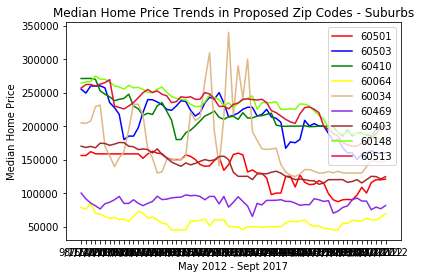

In [14]:
#Removing the most downward trends for a cleaner graph

#Visualize real estate pricing trends for each zip code
# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)


# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)

Summit, = plt.plot(months60501, price60501, color="red", label="60501")
Aurora, = plt.plot(months60503, price60503, color="blue", label="60503")
Channahon, = plt.plot(months60410, price60410, color="green", label="60410")
#River_Grove, = plt.plot(months60171, price60171, color="orange", label="60171")
North_Chicago, = plt.plot(months60064, price60064, color="yellow", label="60064")
#Evanston, = plt.plot(months60203, price60203, color="cyan", label="60203")
#Schaumburg, = plt.plot(months60173, price60173, color="magenta", label="60173")
Hebron, = plt.plot(months60034, price60034, color="burlywood", label="60034")
Posen, = plt.plot(months60469, price60469, color="blueviolet", label="60469")
Crest_Hill, = plt.plot(months60403, price60403, color="brown", label="60403")
Lombard, = plt.plot(months60148, price60148, color="chartreuse", label="60148")
Brookfield, = plt.plot(months60513, price60513, color="crimson", label="60513")

plt.title("Median Home Price Trends in Proposed Zip Codes - Suburbs")
plt.xlabel("May 2012 - Sept 2017")
plt.ylabel("Median Home Price")

plt.legend(handles=[Summit, Aurora, Channahon, North_Chicago, Hebron, Posen, Crest_Hill, Lombard, Brookfield], loc="best")

plt.savefig("proposed_suburb_trends_2.PNG")

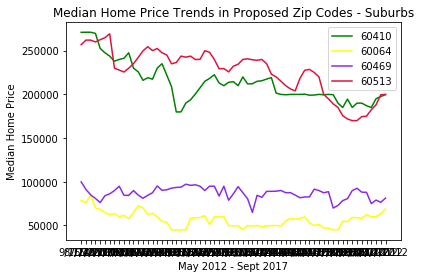

In [15]:
#Removing the most downward trends for a cleaner graph (again)

#Visualize real estate pricing trends for each zip code
# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)


# 60501 (Summit), 60503 (Aurora), 60410 (Channahon), 60171 (River Grove), 60064(North Chicago), 60203 (Evanston), 
#60173 (Schaumburg), 60034 (Hebron), 60469 (Posen), 60403 (Crest Hill), 60148 (Lombard), and 60513 (Brookfield)

#Summit, = plt.plot(months60501, price60501, color="red", label="60501")
#Aurora, = plt.plot(months60503, price60503, color="blue", label="60503")
Channahon, = plt.plot(months60410, price60410, color="green", label="60410")
#River_Grove, = plt.plot(months60171, price60171, color="orange", label="60171")
North_Chicago, = plt.plot(months60064, price60064, color="yellow", label="60064")
#Evanston, = plt.plot(months60203, price60203, color="cyan", label="60203")
#Schaumburg, = plt.plot(months60173, price60173, color="magenta", label="60173")
#Hebron, = plt.plot(months60034, price60034, color="burlywood", label="60034")
Posen, = plt.plot(months60469, price60469, color="blueviolet", label="60469")
#Crest_Hill, = plt.plot(months60403, price60403, color="brown", label="60403")
#Lombard, = plt.plot(months60148, price60148, color="chartreuse", label="60148")
Brookfield, = plt.plot(months60513, price60513, color="crimson", label="60513")

plt.title("Median Home Price Trends in Proposed Zip Codes - Suburbs")
plt.xlabel("May 2012 - Sept 2017")
plt.ylabel("Median Home Price")

plt.legend(handles=[Channahon, North_Chicago, Posen, Brookfield], loc="best")

plt.savefig("proposed_suburb_trends_3.PNG")